Reference
> - [http://stackoverflow.com/questions/26413185/how-to-recover-matplotlib-defaults-after-setting-stylesheet]
> - [https://datascienceschool.net/view-notebook/d0b1637803754bb083b5722c9f2209d0/]


###### graceful interrupt of while loop in ipython notebook
- https://stackoverflow.com/questions/37280920/graceful-interrupt-of-while-loop-in-ipython-notebook
 - You can trigger a KeyboardInterrupt in a Notebook via the menu "Kernel --> Interrupt".

In [1]:
import time
from IPython.display import clear_output


def do_something():
    from datetime import datetime
    clear_output(wait=True)
    print(datetime.now())
    time.sleep(0.1)
    
try:
    while True:
        do_something()
except KeyboardInterrupt:
    pass

2018-09-20 11:01:57.448740


###### Dynamically update plots

- ref: https://stackoverflow.com/questions/24816237/ipython-notebook-clear-cell-output-in-code/24818304

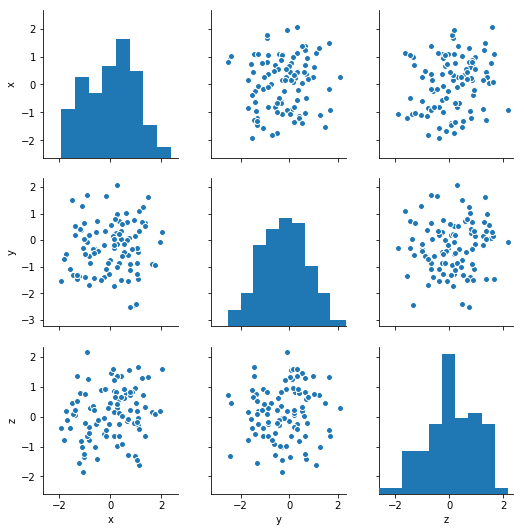

In [3]:
import time

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

for i in range(10):

    data = pd.DataFrame(np.random.randn(100, 3), columns=['x', 'y', 'z'])
    grid = sns.pairplot(data)
    
    # code for fixed axis -->
    if i == 0:
        xlim = {}
        ylim = {}
        for (i, j), axe in np.ndenumerate(grid.axes):
            xlim[(i, j)] = axe.get_xlim()
            ylim[(i, j)] = axe.get_ylim()
    else:
        for (i, j), axe in np.ndenumerate(grid.axes):
            axe.set_xlim(xlim.get((i, j)))
            axe.set_ylim(ylim.get((i, j)))
    # <--
    
    clear_output(wait=True)
    plt.show()
    time.sleep(0.1)

###### use popup for plot

In [ ]:
%matplotlib tk

### Plotting each column of DataFrame or np.array

In [69]:
def plot_dist_columns(data, sample_size=300, subplot_n_cols_max=2, subplot_n_rows_max=3, figsize=(11, 5)):
    """
    Limitation: currently only supports numeric columns

    :param subplot_n_cols_max:
    :param data: pandas.DataFrame or numpy.ndarray whose samples are stacked up
    :param sample_size: maximum number of samples
    :param subplot_n_cols_max:
    :param subplot_n_rows_max:
    :param figsize
    :return: many plots
    """
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.rcParams["figure.figsize"] = figsize

    if isinstance(data, list) or isinstance(data, dict):
        data = pd.DataFrame(data)

    if isinstance(data, pd.DataFrame):
        n_rows = len(data)
        if n_rows <= sample_size:
            sampled_df = data
        else:
            sampled_df = data.sample(sample_size)
    elif isinstance(data, np.ndarray):
        if len(data.shape) == 1:
            data = data.reshape(-1, 1)
        n_rows = data.shape[0]
        if n_rows <= sample_size:
            sampled_df = pd.DataFrame(data)
        else:
            sampled_df = pd.DataFrame(data[np.random.choice(n_rows, sample_size, replace=False), :])
    else:
        raise NotImplementedError  # unknown type of data

    n_columns = data.shape[1]
    subplot_n_cols = min(n_columns, subplot_n_cols_max)
    subplot_n_rows = min(subplot_n_rows_max, int(np.ceil(n_columns / subplot_n_cols)))
    fig, axs = plt.subplots(nrows=subplot_n_rows, ncols=subplot_n_cols)

    i = 0
    for col in sampled_df.columns:
        index_x = int(i / subplot_n_cols)
        index_y = i - index_x * subplot_n_cols
        if n_columns > 1:
            this_axs = axs[index_x][index_y]
        else:
            this_axs = axs
        sns.distplot(sampled_df.loc[:, col], ax=this_axs)
        # plt.title(str(col))
        # this_axs.title.set_text(str(col))

        i += 1
        if i > subplot_n_rows * subplot_n_cols and n_columns > 1:
            i = 0
            plt.tight_layout()
            plt.show()

            fig, axs = plt.subplots(nrows=subplot_n_rows, ncols=subplot_n_cols)  # for 2nd and so on

    plt.tight_layout()  # for last subplots
    plt.show()

    return this_axs

In [61]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [62]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
data1 = pd.DataFrame(data= iris['target'],
                     columns= ['target'])

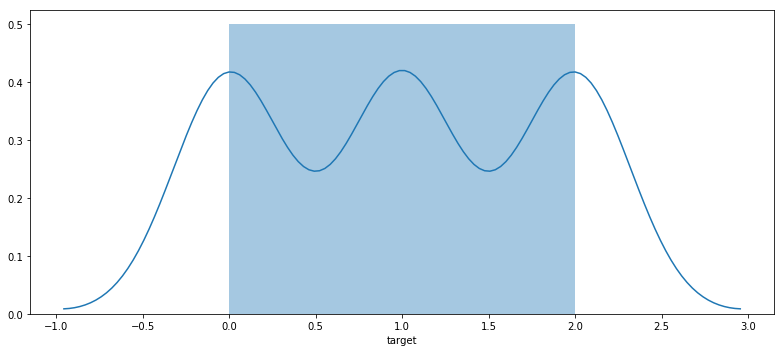

In [63]:
# with dataframe
plot_dist_columns(data1)

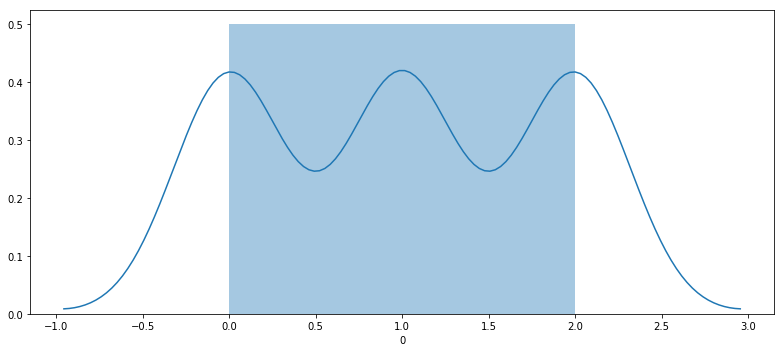

In [64]:
# with ndarray
plot_dist_columns(data1.values)

###### List plotter

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (11,5)
plt.style.use('ggplot')

def plot_list(val_list, desc=None):
    plt.bar(range(len(val_list)), val_list, label=desc)
    if desc is not None:
        plt.legend()

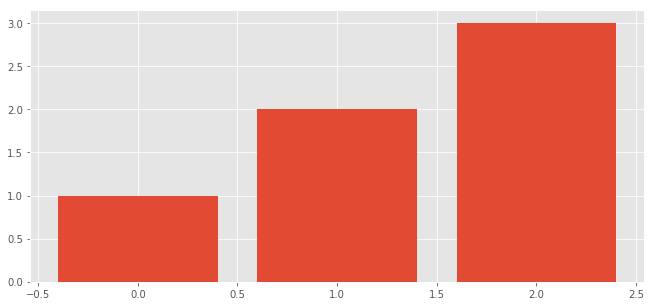

In [15]:
plot_list([1, 2, 3])

In [1]:
# for pycharm bar
def plot_list(val_list, desc=None):
    import matplotlib.pyplot as plt
    plt.bar(range(len(val_list)), val_list, label=desc)
    if desc is not None:
        plt.legend()
    plt.show()

In [2]:
# for pycharm hist
def plot_list(val_list, bins='auto'):
    import matplotlib.pyplot as plt
    plt.hist(val_list, bins=bins)
    plt.show()

### Function plotter

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline
plt.rcParams["figure.figsize"] = (11,5)
plt.style.use('ggplot')

def plot_functions(x, functions=[], labels=[]):
    for i, (func, label) in enumerate(zip(functions, labels)):
        y = [func(_) for _ in x]
        plt.plot(x, y, label=label, color='C'+str(i))
    plt.legend()

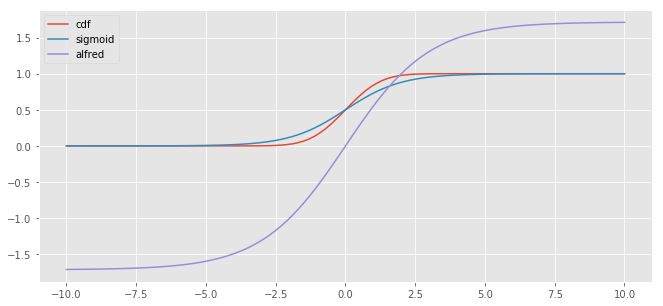

In [8]:
x = np.linspace(-10, 10, 100)

cdf = norm.cdf
sigmoid = lambda x: 1 / (1 + np.exp(-x))
alfred = lambda x: sigmoid(x * 0.667) * 2 * 1.716 - 1.716

plot_functions(x, 
               [cdf,
                sigmoid
                , alfred]
               , ['cdf', 'sigmoid', 'alfred'])

**Back to default setting**

In [14]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

###### Show plot inline

In [2]:
%matplotlib inline

# or plt.show()

###### Simple Drawing 1

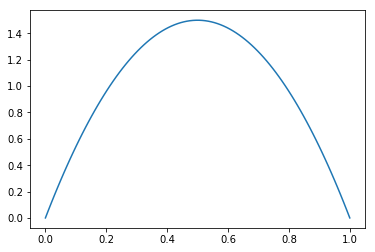

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl


alpha = 2
beta = 2
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior')


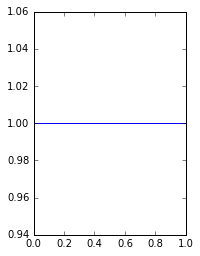

In [17]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

alpha=1000
beta=1000
x = np.linspace(0, 1, 1000)
plt.subplot(1, 2, 1)
plt.plot(x, stats.beta.pdf(x, 1, 1), label='prior');
#help(np.linspace)

         

###### Simple Drawing 2

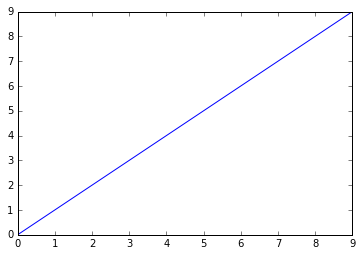

In [18]:
plt.plot(range(10))

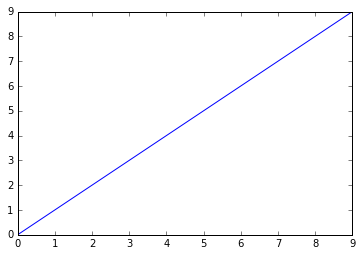

In [19]:
inline_rc = dict(mpl.rcParams)
mpl.rcParams.update(inline_rc)
plt.plot(range(10))

###### Style

['seaborn-whitegrid', 'seaborn-talk', 'grayscale', 'seaborn-notebook', 'bmh', 'seaborn-white', 'seaborn-colorblind', 'dark_background', 'seaborn-bright', 'ggplot', 'seaborn-darkgrid', 'seaborn-ticks', 'seaborn-dark', 'seaborn-deep', 'seaborn-paper', 'seaborn-muted', 'seaborn-dark-palette', 'fivethirtyeight', 'classic', 'seaborn-poster', 'seaborn-pastel']


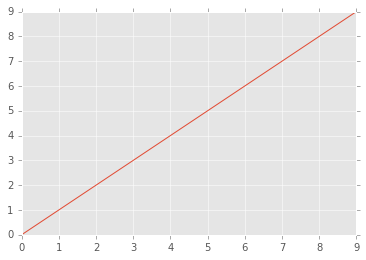

In [20]:
plt.style.use('ggplot')
plt.plot(range(10))
print(plt.style.available)
#['ggplot', 'fivethirtyeight', 'dark_background', 'bmh', 'grayscale']


###### Subplot

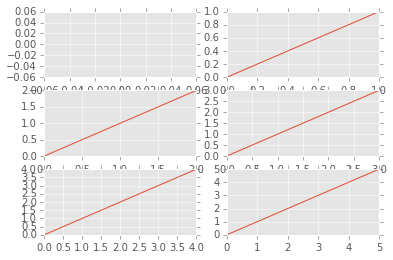

In [31]:
inline_rc = dict(mpl.rcParams)
mpl.rcParams.update(inline_rc)

plt.subplot(3,2,1)
plt.plot(range(1))

plt.subplot(3,2,2)
plt.plot(range(2))

plt.subplot(3,2,3)
plt.plot(range(3))

plt.subplot(3,2,4)
plt.plot(range(4))

plt.subplot(3,2,5)
plt.plot(range(5))

plt.subplot(3,2,6)
plt.plot(range(6))

###### Drawing ROC Curve

http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

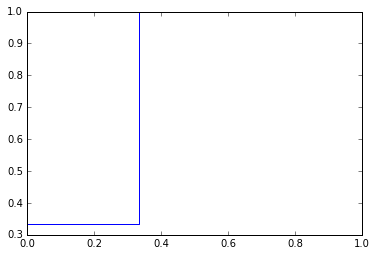

In [1]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

fpr = dict()
tpr = dict()
roc_auc = dict()

y_test  = [1,     1,     1,     0,     0,     0]
y_score = [0.9, 0.7,  0.45,  0.20,  0.76,  0.43]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)


plt.figure()
plt.plot(fpr, tpr, label='blablabla')

###### Plotting filled distribution

http://hamelg.blogspot.kr/2015/11/python-for-data-analysis-part-22.html

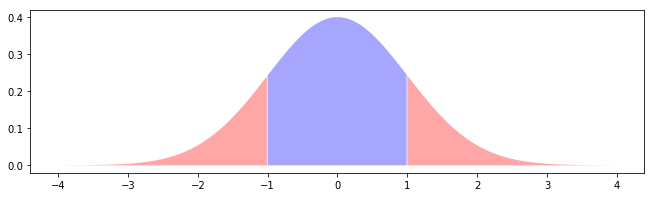

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats  as stats
%matplotlib inline

plt.rcParams["figure.figsize"] = (11,3)

plt.fill_between(x=np.arange(-4,-1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(1,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1,4,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-1,1,0.01), 
                 y1= stats.norm.pdf(np.arange(-1,1,0.01)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.show()

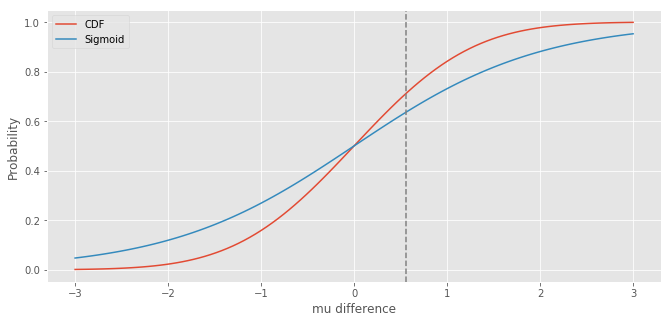

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.stats import norm
pdf = norm.pdf
cdf = norm.cdf
icdf = norm.ppf  # inverse CDF
sigmoid = lambda x: 1 / (1 + np.exp(-x))

%matplotlib inline
plt.rcParams["figure.figsize"] = (11,5)
plt.style.use('ggplot')

x = np.linspace(-3, 3, 100)
y1 = cdf(x)
y2 = sigmoid(x)
plt.plot(x, y1, label='CDF')
plt.plot(x, y2, label='Sigmoid')
plt.axvline(x=0.555, color='Grey', linestyle='--')  # vertical line
plt.ylabel('Probability')
plt.xlabel('mu difference')
plt.legend()

###### Inverted x or y axis

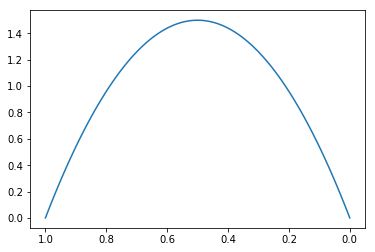

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
alpha = 2
beta = 2
x = np.linspace(0, 1, 100)
plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
plt.plot(x, stats.beta.pdf(x, alpha, beta), label='prior')




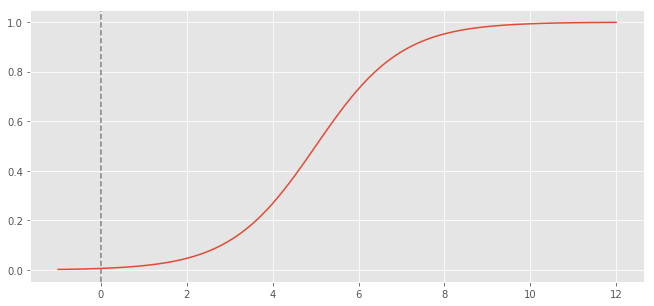

In [53]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (11,5)
plt.style.use('ggplot')


def sigmoid(x, maximum=1, steepness=1, mid=0):
    return maximum / (1 + np.exp(-steepness * (x - mid)))


x = np.linspace(-1, 12, 100)
y = sigmoid(x , steepness=1, mid=5)
plt.plot(x, y, label='sigmoid')
plt.axvline(x=0, color='Grey', linestyle='--')  # vertical line


In [48]:
np.round(sigmoid(20, steepness=1, mid=10), 1)

1.0